# Análisis visual de los discursos de apertura del Director General de la OMS sobre la COVID-19

## Introducción  

En este proyecto, usaré algunas herramientas de web scraping para python para tener una vista simple de las palabras más comunes utilizadas en dos discursos diferentes de apertura del Director General de la OMS sobre la COVID-19 que se encuentran en la página oficial de la organización  mundial de la salud.

Después de recuperar los datos usando <b>BeautifulSoup</b> , usaremos el paquete <b>WordCloud</b> para convertir nuestro texto obtenido en una imagen de nube de palabras para enfocarnos en las palabras usadas en él.
Además, representaré las 10 palabras más comunes en cada una usando Matplotlib. La idea es comparar la diferencia entre ellos dentro de aproximadamente un año de diferencia.

Finalmente, analizaré los resultados de manera muy superficial ya que el objetivo principal de este proyecto es demostrar la utilidad de las bibliotecas utilizadas para python.

## Datos

Los datos utilizados para este proyecto se extrajeron del sitio oficial de la organización mundial de la salud en la sección  de discursos del director general de la OMS https://www.who.int/es/director-general/speeches y luego se limpiaron debido a su sintaxis.
Se cambió la transcripción de los discursos de las fechas "20 de marzo de 2020" y "6 de abril de 2021".
Las tecnologías utilizadas aquí fueron IBM Watson Studio para el entorno de los cuadernos Jupyter en python y GitHub para el repositorio.

# Metodología  

## Extraer datos de Wikipedia usando BeautifulSoup

In [240]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [241]:
website_url= rq.get('https://www.who.int/es/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---20-march-2020').text #B

## Ahora usaremos la biblioteca BeautifulSoup

In [242]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data

"['Buenos días, buenas tardes y buenas noches, dondequiera que estén.', 'Cada día que pasa, la COVID-19 parece marcar un nuevo y trágico hito.', 'Se han notificado a la OMS más de 210 000 casos y han perdido la vida más de 9000 personas.', 'Cada vida perdida es una tragedia. También es una motivación para redoblar esfuerzos y hacer todo lo posible por detener la transmisión y salvar vidas.', 'También debemos celebrar nuestros éxitos. Ayer, Wuhan no notificó nuevos casos por primera vez desde el inicio del brote.', 'Wuhan infunde esperanzas al resto del mundo: incluso la situación más grave puede revertirse.', 'Por supuesto, debemos ser precavidos. La situación podría cambiar. Pero la experiencia de las ciudades y los países que han logrado detener este virus dan esperanza y valor al resto del mundo.', 'Cada día que pasa vamos sabiendo más cosas sobre este virus y la enfermedad que causa.', 'Una de las lecciones que estamos extrayendo es que si bien los más golpeados son las personas ma

## ¿Qué son las Nubes de Palabras?

Una nube de palabras es una colección, o grupo, de palabras representadas en diferentes tamaños. Cuanto más grande y en negrita aparece la palabra, más a menudo se menciona dentro de un texto determinado y más importante es. Para esta tarea, usaremos la biblioteca de python llamada 'word_cloud' desarrollada por <b>Andreas Mueller</b>.

In [243]:
!pip -q install wordcloud

In [244]:
!pip -q install stop-words


In [245]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [246]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [247]:
stop_words = ["año", "mil", "millones", "pesos", "ciento", "El", "En","xa0'","'\xa0',", "',", "'El", "ser", "'En", "si", "podría", "puede"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
amlo_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
amlo_wc.generate(data)


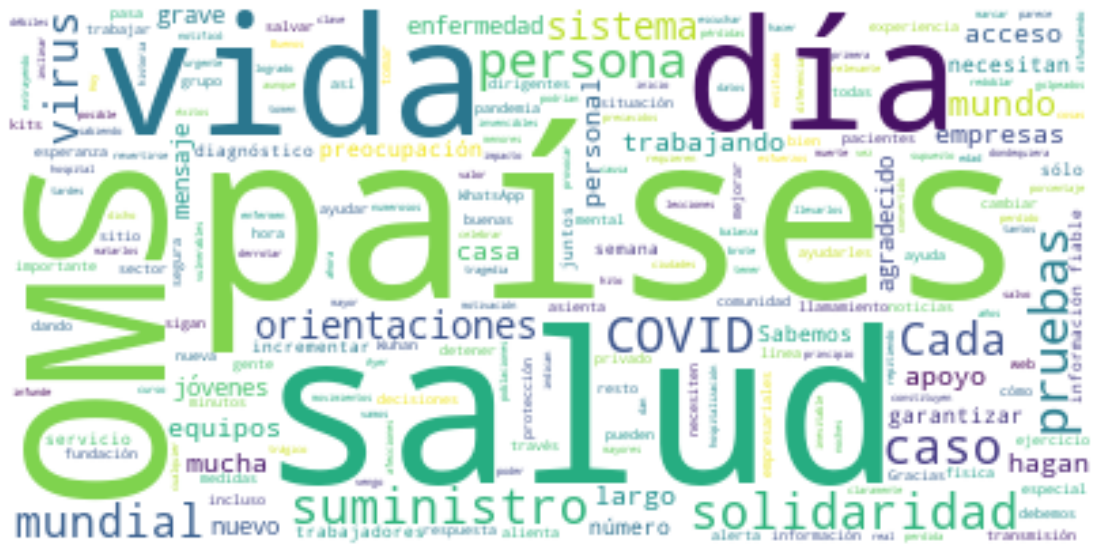

In [248]:
# display the word cloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


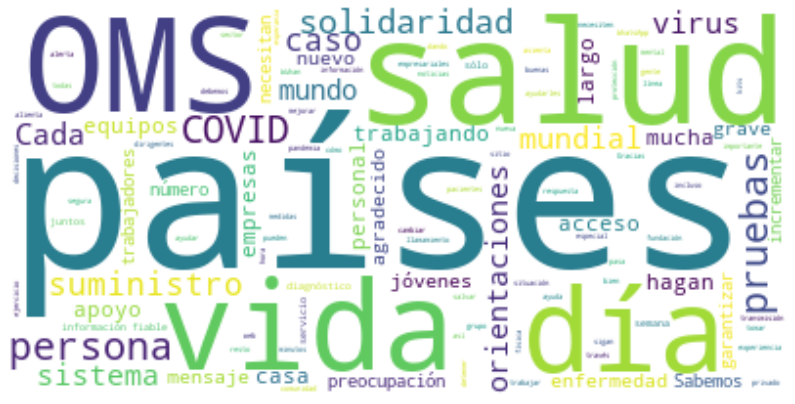

In [249]:
# re-generate the word cloud
amlo_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Recuperando la imagen para la máscara

In [261]:
# save mask to mx_mask
mx_mask = np.array(Image.open('covid.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


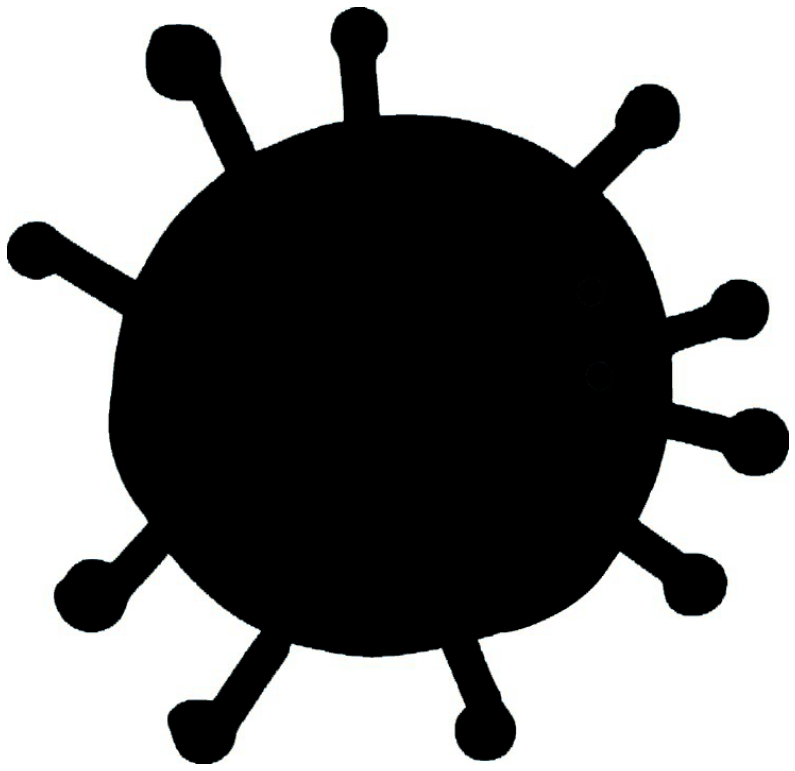

In [262]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

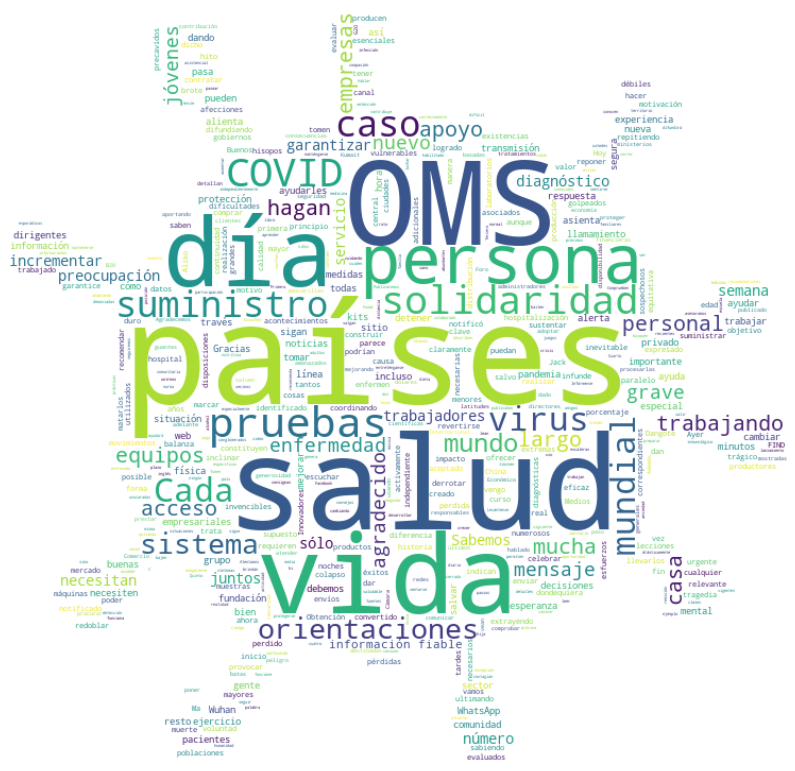

In [263]:
# instantiate a word cloud object
amlo_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
amlo_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Preparando los datos para graficar y contar las palabras.

In [264]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

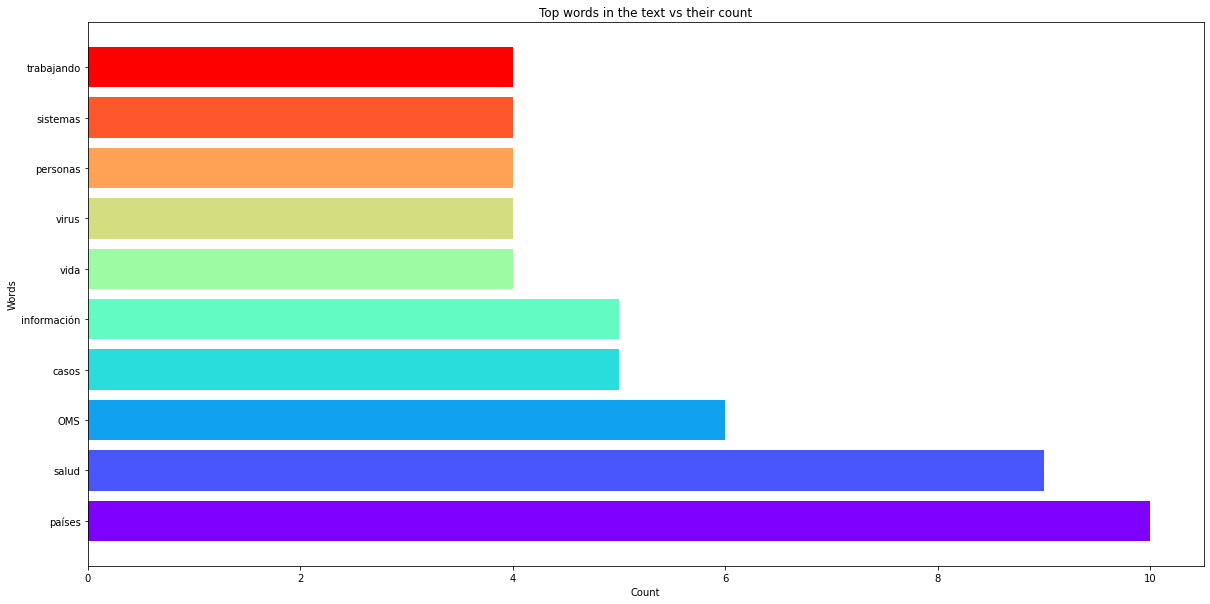

In [265]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Segundo discurso 

In [266]:
website_url2= rq.get('https://www.who.int/es/director-general/speeches/detail/director-general-s-opening-remarks-at-the-media-briefing-on-covid-19-6-april-2021').text #Bring the data from the target URL


In [267]:
soup2 = BeautifulSoup(website_url2,'lxml')

data2 = [element.text for element in soup2.find_all("p")] #Retrieving text from "p" founds
data2 = str(data2) #Convert to string

In [268]:
stop_words2 = ["año", "mil", "millones", "pesos", "ciento", "El", "En", "Y","'Y", "ser", "van", "va", "Es","pues", "dos","'Entonces,", "cómo", "ahí", "años","'El", "ser", "'En", "si", "podría", "puede", "'===',", "cada"] + stop_words_es #Adding aditional StopWords
amlo_wc2 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words2
)

# generate the word cloud
amlo_wc2.generate(data2)

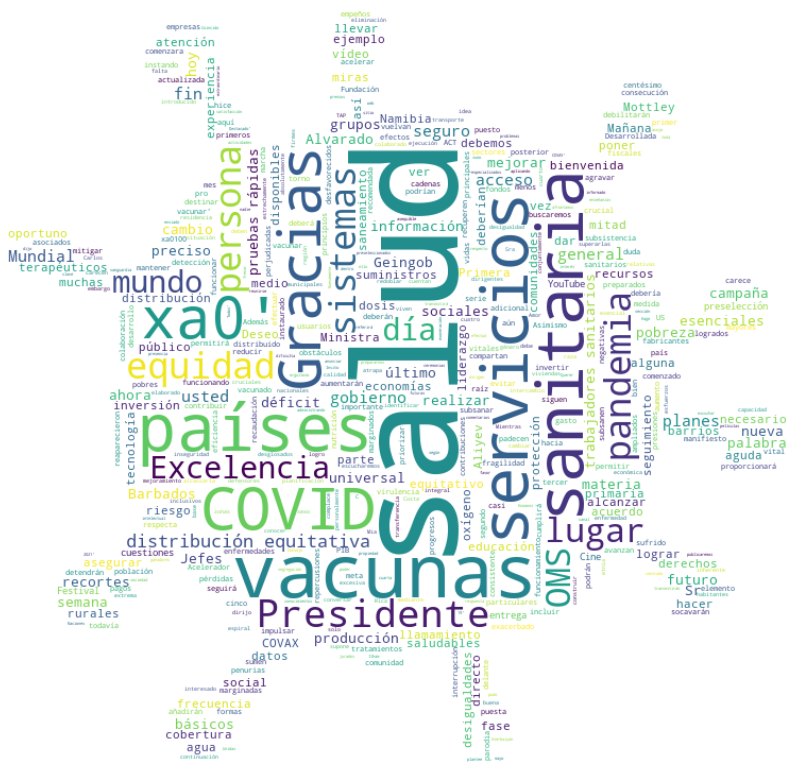

In [269]:
# instantiate a word cloud object
amlo_wc2 = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words2)

# generate the word cloud
amlo_wc2.generate(data2)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(amlo_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [270]:
filtered_words2 = [word for word in data2.split() if word not in stop_words2]
counted_words2 = collections.Counter(filtered_words2)

words = []
counts = []
for letter, count in counted_words2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

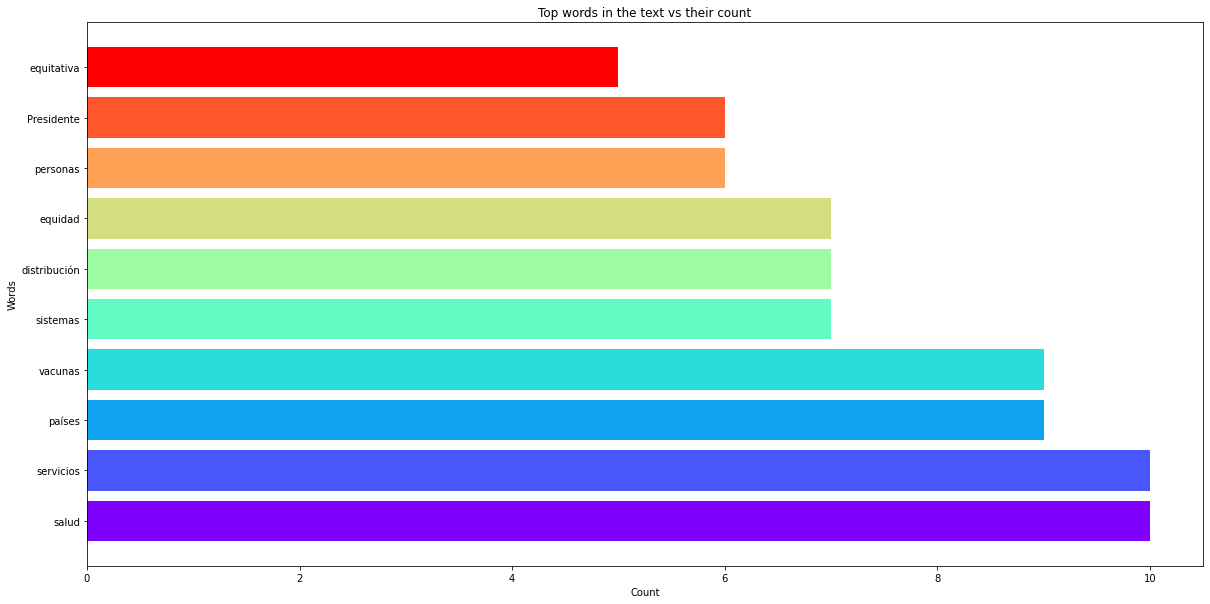

In [271]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Resultados 

### Alocución de apertura del Director General de la OMS en la rueda de prensa sobre la COVID-19 celebrada el 20 de marzo de 2020, top 10 palabras.

1. países 
2. salud
3. OMS
4. casos
5. información
6. vida
7. virus
8. personas
9. sistemas 
10. trabajando

### Alocución de apertura del Director General de la OMS en la rueda de prensa sobre la COVID-19 celebrada el 6 de abril de 2021, top 10 palabras.

1. Salud
2. Servicios
3. Países 
4. vacunas
5. sistemas
6. distribución
7. equidad
8. personas
9. Presidente
10. equitativa

## Conclusión 

Se puede observar que en el discurso dado en el año 2020 se utilizan palabras las cuales detonan una preocupación para la organización mundial de la salud ya que hacen notar el peligro que podría detonar el virus COVID – 19 para países con un sistema de salud débil, ya que se han reportado varios casos de contagios y pérdida de vidas. Poniéndola en comparación con el discurso realizado en el 2021 ya podemos notar un cierto cambio, siguen hablando de los sistemas de salud sin embargo ya se introdujo el tema de la vacuna y como va ayudar a los países.

Aunque no se haya hecho un análisis profundo al contenido de las transcripciones de los discursos en este trabajo, nos podemos dar cuenta de los puntos que la OMS se en foca más y como contrasta este con el año siguiente 

En conclusión, podemos usar estas herramientas para tener una idea de lo que representa el discurso de la OMS y cómo cambió de año en año de manera que sea fácil identificar visualmente los puntos importantes que la OMS quiere resaltar.

## Referencias

<a href="https://www.who.int/es/director-general/speeches">https://www.who.int/es/director-general/speeches</a>

<a href="https://github.com/amueller/word_cloud/">https://github.com/amueller/word_cloud/</a>

<a href="https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx">https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx</a>

<a href="https://matplotlib.org/">https://matplotlib.org/</a>

Cuaderno realizado para una práctica de <b>Heyner Fernando Cruz Guzmán</b> para la asignatura de <b>Business Intelligence</b> impartida por <b>Luis Novelo</b> en la <b>Universidad Modelo</b>.